이미지 인식을 위한 CNN
===
* MNIST 데이터를 통해 CNN의 이미지 인식 연습
    * MNIST 데이터셋은 70,000개의 글자 이미지에 각각 0부터 9까지 이름표를 붙인 데이터셋
## 1. 데이터 전처리

In [1]:
# mnist 자료 로드
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets.mnist import load_data

# 자동완성용 라이브러리 로드
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Dense

# MNIST 데이터는 7만개의 이미지 중 6만개를 학습용으로, 1만개를 테스트용으로 미리 구분.
(X_train, y_class_train), (X_test, y_class_test) = load_data()

* matplotlib을 통한 시각적 확인.
    * $28\times28$ 픽셀, 0~255 까지 밝기 등급으로 표현.
    * 행렬로 이루어진 하나의 집합으로 변환됨.

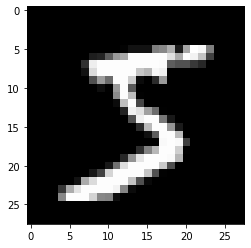

In [2]:
import matplotlib.pyplot as plt
import numpy as np

first_image = X_train[0]
first_image = np.array(first_image, dtype=float)
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap="gray")
plt.show()

* 주어진 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 바꿔 줌.
* 이를 위해 reshape() 함수를 사용.
* keras는 데이터를 0에서 1사이의 값으로 변환한 다음 구동할 때 최적의 성능을 보임.
    * 따라서 현재 0~255 사이의 값으로 이루어진 값을 0~1 사이의 값으로 바꿔야 함.
* 데이터의 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정 : 데이터 정규화(normalization).
    * 정규화를 위해 astype()를 이용해 실수형으로 바꾼 뒤 255로 나눠줌(min-max).

In [3]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype("float64")
X_train = X_train / 255

In [4]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

* 레이블의 값은 5와 같이 이미지를 나타내는 카테고리형.
* 딥러닝의 분류 문제는 원-핫 인코딩 방식을 적용함.

In [5]:
y_train = to_categorical(y_class_train, 10)
y_test = to_categorical(y_class_test, 10)

In [6]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 2. 딥러닝 기본 프레임 만들기
* 입력 값(input_shape)이 784개, 은닉층이 512개 그리고 출력이 10개인 모델.
* 활성화 함수로 은닉층에서는 relu를, 출력층에서는 softmax를 사용.
* 딥러닝 실행 환경을 위해 오차 함수로 CategoricalCrossentropy, 최적화 함수로 adam을 사용.
* 모델의 실행에 앞서 모델의 성과를 저장하고 모델의 최적화 단계에서 학습을 자동 중단하게끔 설정.

In [7]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 자동완성
from keras.callbacks import ModelCheckpoint, EarlyStopping

# 모델 저장할 폴더 경로 및 파일명
model_dir = "./model/"
if not os.path.exists(model_dir) :
    os.mkdir(model_dir)

modelpath = "./model/{epoch:02d}_{val_loss:.4f}.hdf5"

# 체크 포인트 설정, 얼리 스탑 기준 지정
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1,
                                save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

cols = 28*28
batch_size = 1000
model = Sequential()
model.add(Dense(units=512, input_shape=(cols, ), activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="CategoricalCrossentropy",
            optimizer="adam",
            metrics=["accuracy"])

# validation_data, callbacks 지정
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=batch_size,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer])

print(f"\n Test Accuracy : {model.evaluate(X_test, y_test)[1]}")


Epoch 1: val_loss improved from inf to 0.26090, saving model to ./model\01_0.2609.hdf5

Epoch 2: val_loss improved from 0.26090 to 0.19351, saving model to ./model\02_0.1935.hdf5

Epoch 3: val_loss improved from 0.19351 to 0.15272, saving model to ./model\03_0.1527.hdf5

Epoch 4: val_loss improved from 0.15272 to 0.12702, saving model to ./model\04_0.1270.hdf5

Epoch 5: val_loss improved from 0.12702 to 0.10996, saving model to ./model\05_0.1100.hdf5

Epoch 6: val_loss improved from 0.10996 to 0.09700, saving model to ./model\06_0.0970.hdf5

Epoch 7: val_loss improved from 0.09700 to 0.09164, saving model to ./model\07_0.0916.hdf5

Epoch 8: val_loss improved from 0.09164 to 0.08632, saving model to ./model\08_0.0863.hdf5

Epoch 9: val_loss improved from 0.08632 to 0.07925, saving model to ./model\09_0.0792.hdf5

Epoch 10: val_loss improved from 0.07925 to 0.07528, saving model to ./model\10_0.0753.hdf5

Epoch 11: val_loss improved from 0.07528 to 0.07338, saving model to ./model\11_0.

* 학습셋에 대한 오차는 계속해서 줄어듦.
* 테스트셋의 과적합이 일어나기 전 학습을 끝낸 모습.

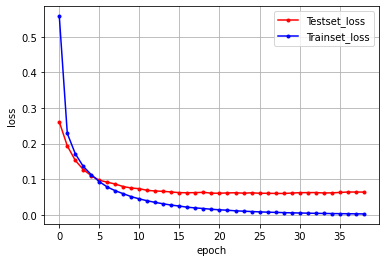

In [8]:
import matplotlib.pyplot as plt

y_vloss = history.history["val_loss"]

# 학습셋의 오차
y_loss = history.history["loss"]

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

## 3. 더 깊은 딥러닝
* 하나의 은닉층을 둔 아주 단순한 모델이지만 98%의 정확도
* 딥러닝은 이러한 기본 모델을 바탕으로, 프로젝트에 맞춰서 어떤 옵션을 더하고 어떤 층을 추가하느냐에 따라 성능이 좋아질 수 있음.
* CNN(Convolutional Neural Networ)를 추가
## 4. CNN
* 컨볼루션 신경망은 입력된 이미지에서 다시 한 번 특징을 추출하기 위해 마스크(필터, 윈도 또는 커널)를 도입하는 기법.
* 예를 입력된 이미지가 다음과 같은 값을 가지고 있다고 가정.
    * $\begin{bmatrix}1&0&1&0\\0&1&1&0\\0&0&1&1\\0&0&1&0\end{bmatrix}$
* 여기에 $2\times2$ 마스크를 준비함
    * 각 칸에는 가중치가 들어있음.
    * $\begin{bmatrix}\times1&\times0\\\times0&\times1\end{bmatrix}$
* 마스크를 이미지의 각 구간에 적용함.
    * 적용된 구간에 원래 있던 값에 가중치의 값을 곱해서 더해줌.
    * $(1\times1)+(0\times0)+(0\times0)+(1\times1)=2$
* 마스크를 한 칸씩 옮겨 모두 적용.
    * $\begin{bmatrix}2&1&1\\0&2&2\\0&1&1\end{bmatrix}$
* 이렇게 새롭게 만들어진 층을 컨볼루션(합성곱)이라고 부름.
* 컨볼루션을 만들면 입력 데이터로부터 더욱 정교한 특징을 추출할 수 있음.
* 마스크를 여러 개 만들 경우 여러 개의 컨볼루션이 만들어짐.
    * 예를 들어, $\begin{bmatrix}\times1&\times1\\\times0&\times0\end{bmatrix}\rarr\begin{bmatrix}1&1&1\\1&2&1\\0&1&2\end{bmatrix}$
### Keras의 CNN
* 케라스에서 컨볼루션 층을 추가하는 함수는 Conv2D()
```python
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
```
* 첫번째 인자 : 마스크를 몇 개 적용할 지 정함. 예시에서는 32개의 마스크를 적용.
* kernel_size : 마스크(커널)의 크기를 정함. kernel_size=(행, 열) 형식으로 정하며, 예시는 $3\times3$ 크기의 마스크를 사용하게끔 정함.
* input_shape : Dense 층과 마찬가지로 맨 처음 층에는 입력되는 값을 알려주어야 함. input_shape=(행,열, 색상 또는 흑백) 형식으로 정함. 만약 입력 이미지가 색상이면 3, 흑백이면 1.
* activation : 활성화 함수를 정의
```python
model.add(Conv2D(64, (3, 3), activation='relu'))
```
* 위와 같이 마스크 64개를 적용한 새로운 컨볼루션 층을 추가할 수 있음.
## 5. Max Pooling
* 컨볼루션 층을 통해 이미지 특징을 도출하였으나 그 결과가 여전히 크고 복잡하면 이를 다시 한 번 축소해야 함.
    * 이 과정을 풀링(pooling) 또는 서브 샘플링(sub sampling)이라고 함.
* 풀링 기법 중 가장 많이 사용되는 기법이 맥스 풀링(max pooling).
* 맥스 풀링은 정해진 구역 안에서 가장 큰 값만 다음 층으로 넘기고 나머지는 버림.
* 예를 들어 다음과 같은 이미지가 있을 때,
    * $\begin{bmatrix}1&0&1&0\\0&4&2&0\\0&1&6&1\\0&0&1&0\end{bmatrix}$
* 맥스 풀링을 적용하여 $(2\times2)$의 4개의 구간으로 나누어 가장 큰 값만을 추출.
    * $\begin{bmatrix}4&2\\1&6\end{bmatrix}$
### Keras의 MaxPooling
* 맥스 풀링을 통해 불필요한 정보를 간추릴 수 있음.
* 케라스에서는 MaxPooling2D()함수를 사용해서 다음과 같이 적용할 수 있음.
```python
model.add(MaxPooling2D(pool_size=2))
```
* 여기서 pool_size는 풀링 창의 크기를 정하는 것으로, 2로 정하면 전체 크기가 절반으로 줄어듦.
### 드롭아웃(drop out)과 플래튼(flatten)
#### 1. 드롭아웃
* 노드가 많아지거나 층이 많아진다고 해서 학습이 무조건 잘 되는 것이 아님.
    * 과적합 발생 가능.
* 과적합을 피하는 간단하지만 효과가 큰 기법이 드롭아웃 기법.
* 드롭아웃은 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것.
* 랜덤하게 노드를 끔으로써 학습 데이터에 지나치게 치우쳐서 학습되는 과적합을 방지할 수 있음.
* 케라스를 이용해 손쉽게 적용가능 / 25% 노드 끄는 코드
```python
model.add(Dropout(0.25))
```
#### 2. 플래튼
* 위의 과정을 다시 Dense() 함수를 이용해 기본층에 연결하려고 할때, 컨볼루션 층이나 맥스 풀링은 주어진 이미지를 2차원 배열인 채로 다룸.
* 이를 1차원으로 바꿔주는 함수가 Flatten() 함수.
```python
model.add(Flatten())
```
## 6. 컨볼루션 신경망 실행

In [9]:
# mnist 자료 로드
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# 자동완성용 라이브러리 로드
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)


# 데이터 로드
(X_train, y_class_train), (X_test, y_class_test) = load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_class_train)
y_test = to_categorical(y_class_test)


# 모델 저장할 폴더 경로 및 파일명
model_dir = "./model/"
if not os.path.exists(model_dir) :
    os.mkdir(model_dir)

modelpath = "./model/{epoch:02d}_{val_loss:.4f}.hdf5"

# 체크 포인트 설정, 얼리 스탑 기준 지정
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1,
                                save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)


# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=2))
# 일반적으로 CNN에서는 드롭아웃 레이어를 Fully connected network 뒤에 놓지만,
# 상황에 따라서는 max pooling 계층 뒤에 놓기도 한다.
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="CategoricalCrossentropy",
            optimizer="adam",
            metrics=["accuracy"])

# validation_data, callbacks 지정
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200,
                    verbose=1, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print(f"\n Test Accuracy : {model.evaluate(X_test, y_test)[1]}")

Epoch 1/30
300/300 [==============================] - ETA: 0s - loss: 0.2166 - accuracy: 0.9349
Epoch 1: val_loss improved from inf to 0.05207, saving model to ./model\01_0.0521.hdf5
300/300 [==============================] - 30s 100ms/step - loss: 0.2166 - accuracy: 0.9349 - val_loss: 0.0521 - val_accuracy: 0.9836
Epoch 2/30
300/300 [==============================] - ETA: 0s - loss: 0.0625 - accuracy: 0.9809
Epoch 2: val_loss improved from 0.05207 to 0.04069, saving model to ./model\02_0.0407.hdf5
300/300 [==============================] - 35s 118ms/step - loss: 0.0625 - accuracy: 0.9809 - val_loss: 0.0407 - val_accuracy: 0.9867
Epoch 3/30
300/300 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9867
Epoch 3: val_loss improved from 0.04069 to 0.03063, saving model to ./model\03_0.0306.hdf5
300/300 [==============================] - 36s 119ms/step - loss: 0.0429 - accuracy: 0.9867 - val_loss: 0.0306 - val_accuracy: 0.9900
Epoch 4/30
300/300 [=====================

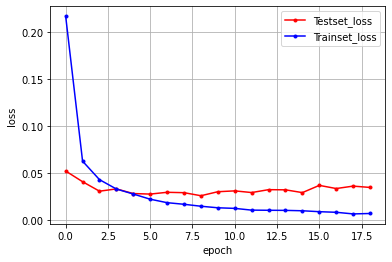

In [10]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history["loss"]

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

* 8번째 에포크에서 베스트 모델을 만들었고 18번째 에포크에서 학습이 자동 중단됨.
* 테스트 정확도가 98.05%에서 99.15%로 향상됨
* 위와 같이 학습의 진행에 따른 학습셋과 테스트셋의 오차 변화를 관측할 수 있음.